In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the data
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
# Show first 5 rows
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [4]:
# Check for missing values
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [5]:
# Check column names
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [6]:
# Define features (X) and target (y)
X = df.drop(columns=['Heart Disease'])  # replace with actual target column name if different
y = df['Heart Disease']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shapes =>", X_train.shape, X_test.shape)

Shapes => (216, 13) (54, 13)


In [7]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  # 'scale' is default
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluation
print("=== Linear Kernel ===")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

print("\n=== RBF Kernel ===")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

=== Linear Kernel ===
              precision    recall  f1-score   support

     Absence       0.89      0.94      0.91        33
    Presence       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

Accuracy: 0.8888888888888888

=== RBF Kernel ===
              precision    recall  f1-score   support

     Absence       0.89      0.94      0.91        33
    Presence       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

Accuracy: 0.8888888888888888


In [9]:
print(df.dtypes)

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


In [10]:
print(df['Heart Disease'].unique())

['Presence' 'Absence']


In [13]:
# Replace string values and explicitly cast to int
df['Heart Disease'] = df['Heart Disease'].replace({
    'Presence': 1,
    'Absence': 0,
    'Yes': 1,
    'No': 0,
    '1': 1,
    '0': 0
})

# Now infer proper data types explicitly (future-safe)
df['Heart Disease'] = df['Heart Disease'].infer_objects().astype(int)

In [14]:
print(df['Heart Disease'].dtype)  # Should now show int64


int64


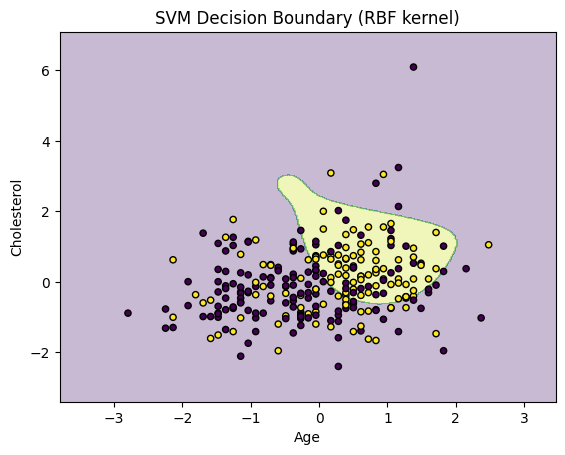

In [17]:
# Pick 2 features just for visualization (e.g., 'Age' and 'Cholesterol')
X_vis = df[['Age', 'Cholesterol']]
y_vis = df['Heart Disease']

# Scale
X_vis_scaled = StandardScaler().fit_transform(X_vis)

# Fit SVM for visualization
svm_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
def plot_svm_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.title('SVM Decision Boundary (RBF kernel)')
    plt.show()

plot_svm_decision_boundary(X_vis_scaled, y_vis, svm_vis)

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_scaled, y)

# Best parameters and accuracy
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.8444444444444444
